## HandWritten Digit Recognition ###(Assignment-1)

Use MNIST dataset to create a classifier for all the 10 digits. First implement the
classifier by squeezing the image into a vector and then using a MLP. Now, try the same
task using a different machine learning classifier such as an SVM to check the gain in
performance by using Perceptrons as compared to conventional machine learning
techniques.

## Importing libraries

In [1]:
# The python modules used for data managment and data exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The python modules for instantiating different algorithms and supplying data for them to learn 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_curve

# Loading data

In [2]:
# Reading or Converting the csv data(comma seperated values) into python understandable DataFrame object using pandas module 
data = pd.read_csv("MNIST_DATASET.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# understanding the features(inputs) and labels(outputs)
features = data.values[:,1:]
label = data["label"].values

In [4]:
features.shape

(42000, 784)

In [5]:
label.shape

(42000,)

# Data analysis

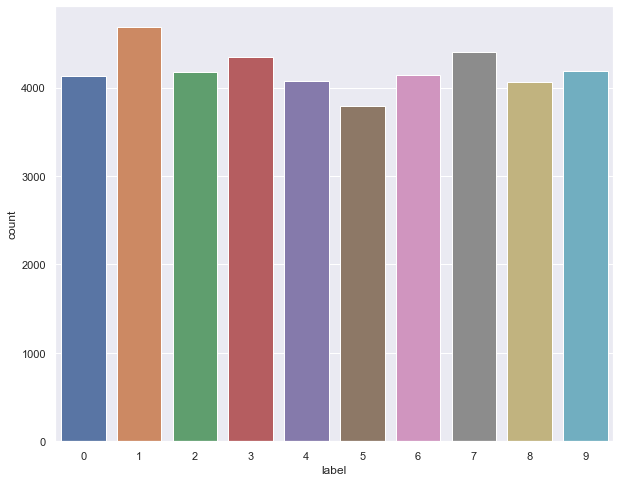

In [5]:
# plotting a bar graph to understand the frequencies of each unique type of handwritten digit
sns.set()
plt.figure(figsize = (10,8))
sns.countplot(x = data["label"])
plt.show()

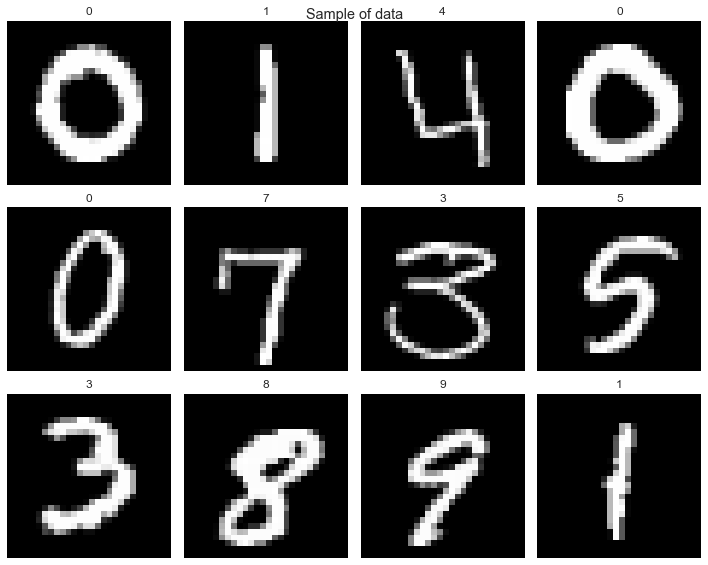

In [6]:
# visualizing the handwritten digits to understand the resolution(28x28) of each input image
plt.figure(figsize = (10,8))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(features[i].reshape(28,28),cmap = "gray")
    plt.title(str(label[i]))
    plt.grid(False)
    plt.axis(False)
plt.suptitle("Sample of data")
plt.tight_layout()
plt.show()

# Preprocessing 

In [7]:
# creating a training and test data sample for creating and evaluating the performance of the different algorithms
X_train, X_test, y_train, y_test = train_test_split(features,label,random_state=1,test_size=0.2)

In [8]:
X_train.shape

(33600, 784)

In [9]:
X_test.shape

(8400, 784)

## Building Multi Layered Perceptron(neural network)

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),random_state=1,max_iter=300,verbose=1,early_stopping=True)

In [11]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}

## Training the neural network

In [12]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 8.73248030
Validation score: 0.888095
Iteration 2, loss = 2.03271022
Validation score: 0.906845
Iteration 3, loss = 1.20845110
Validation score: 0.918452
Iteration 4, loss = 0.81751243
Validation score: 0.929167
Iteration 5, loss = 0.55627486
Validation score: 0.922619
Iteration 6, loss = 0.41172255
Validation score: 0.931845
Iteration 7, loss = 0.33685242
Validation score: 0.937500
Iteration 8, loss = 0.24404922
Validation score: 0.937500
Iteration 9, loss = 0.19452541
Validation score: 0.943452
Iteration 10, loss = 0.16576737
Validation score: 0.947619
Iteration 11, loss = 0.12964970
Validation score: 0.939881
Iteration 12, loss = 0.14841901
Validation score: 0.942560
Iteration 13, loss = 0.13400446
Validation score: 0.947024
Iteration 14, loss = 0.11645399
Validation score: 0.940774
Iteration 15, loss = 0.17213820
Validation score: 0.948214
Iteration 16, loss = 0.12042493
Validation score: 0.947321
Iteration 17, loss = 0.09183126
Validation score: 0.942857
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

## Evaluation of MLP

In [13]:
mlp_predictions = mlp.predict(X_test)
mlp_predictions

array([1, 5, 2, ..., 8, 8, 8])

In [14]:
print(f"accuracy of mlp classifier is {round(accuracy_score(mlp_predictions,y_test)*100,2)}\n")
print(classification_report(mlp_predictions,y_test))

accuracy of mlp classifier is 95.88

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       852
           1       0.97      0.99      0.98       922
           2       0.95      0.96      0.96       831
           3       0.95      0.93      0.94       896
           4       0.96      0.98      0.97       815
           5       0.94      0.94      0.94       730
           6       0.99      0.98      0.98       808
           7       0.95      0.96      0.96       841
           8       0.95      0.95      0.95       842
           9       0.94      0.92      0.93       863

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



## Instantiating SVM Classifier Algorithm (SVC)

In [15]:
clf = SVC(random_state=1,kernel="linear",gamma="auto",max_iter=100)
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': 100,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Training the SVC Algorithm

In [16]:
clf.fit(X_train,y_train)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=100, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

## Evaluation of MLP

In [17]:
svm_predictions = clf.predict(X_test)
svm_predictions 

array([1, 5, 2, ..., 8, 8, 8])

In [18]:
print(f"accuracy of svm classifier is {round(accuracy_score(svm_predictions,y_test)*100,2)}\n")
print(classification_report(svm_predictions,y_test))

accuracy of svm classifier is 76.65

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       916
           1       0.86      0.85      0.85       944
           2       0.80      0.79      0.80       843
           3       0.76      0.68      0.72       968
           4       0.79      0.68      0.73       966
           5       0.68      0.66      0.67       752
           6       0.84      0.93      0.89       727
           7       0.83      0.80      0.81       880
           8       0.62      0.68      0.65       772
           9       0.50      0.66      0.57       632

    accuracy                           0.77      8400
   macro avg       0.76      0.76      0.76      8400
weighted avg       0.78      0.77      0.77      8400



# Result

In [23]:
print(f"The Gain in performance of Perceptrons over SVM is : {(accuracy_score(mlp_predictions,y_test)-accuracy_score(svm_predictions,y_test))*100} %")

The Gain in performance of Perceptrons over SVM is : 19.70238095238095 %
